In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-football-results-from-1872-to-2017/goalscorers.csv
/kaggle/input/international-football-results-from-1872-to-2017/shootouts.csv
/kaggle/input/international-football-results-from-1872-to-2017/results.csv


**Importing Libraries**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ****Data Exploration

In [30]:
df = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/results.csv')
df.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [31]:
print(f"This Dataset Includes {df.shape}")

This Dataset Includes (45100, 9)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45100 entries, 0 to 45099
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        45100 non-null  object
 1   home_team   45100 non-null  object
 2   away_team   45100 non-null  object
 3   home_score  45100 non-null  int64 
 4   away_score  45100 non-null  int64 
 5   tournament  45100 non-null  object
 6   city        45100 non-null  object
 7   country     45100 non-null  object
 8   neutral     45100 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [33]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [34]:
df.describe()

home_score    away_score
count  45100.000000  45100.000000
mean       1.739601      1.177982
std        1.746247      1.392395
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000

In [35]:
df.describe(include=object)

date home_team away_team tournament          city        country
count        45100     45100     45100      45100         45100          45100
unique       15636       312       307        147          2040            268
top     2012-02-29    Brazil   Uruguay   Friendly  Kuala Lumpur  United States
freq            66       599       564      17762           677           1335

In [36]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [37]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# ****Exploratory Data Analysis

# pairplot

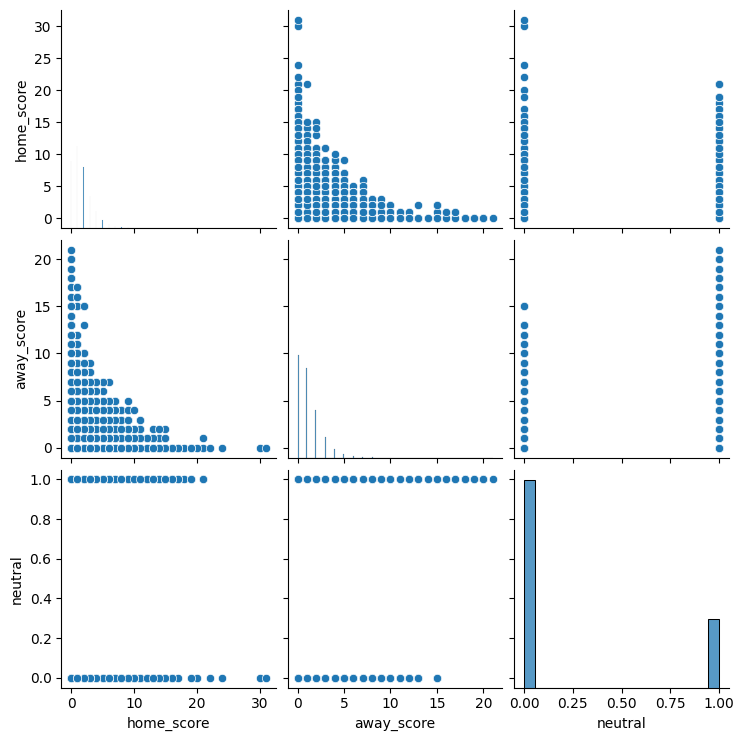

In [38]:
sns.pairplot(data=df)

# Tournament Analysis

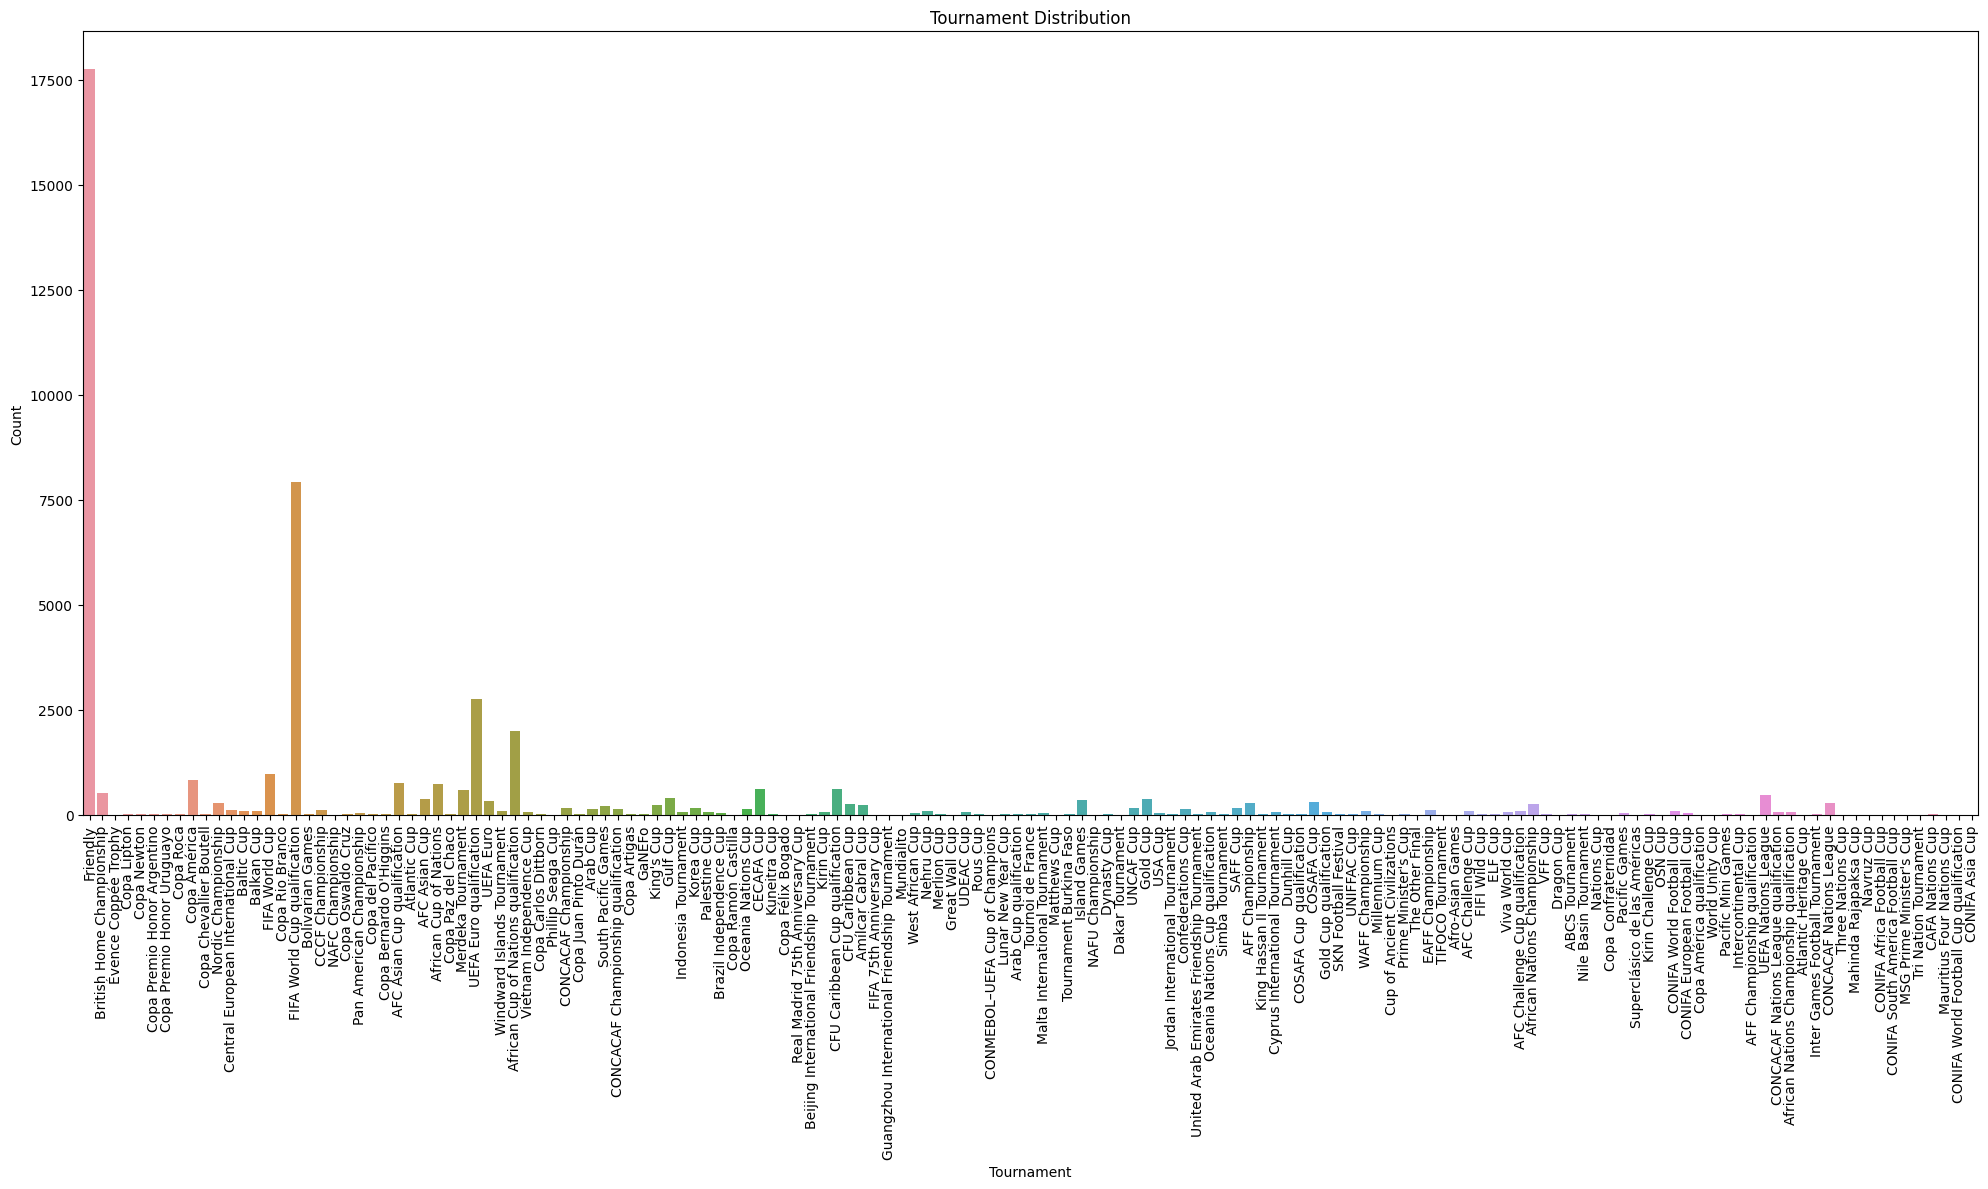

In [39]:
plt.figure(figsize=(20, 12))
sns.countplot(x='tournament', data=df)
plt.xticks(rotation=90)
plt.title('Tournament Distribution')
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#  Histogram of home scores

In [40]:
fig = px.histogram(df, x='home_score', nbins=50, title='Home Score Distribution')
fig.show()


#  Histogram of away scores

In [41]:
fig = px.histogram(df, x='away_score', nbins=50, title='Away Score Distribution')
fig.show()


# Home and Away Scores

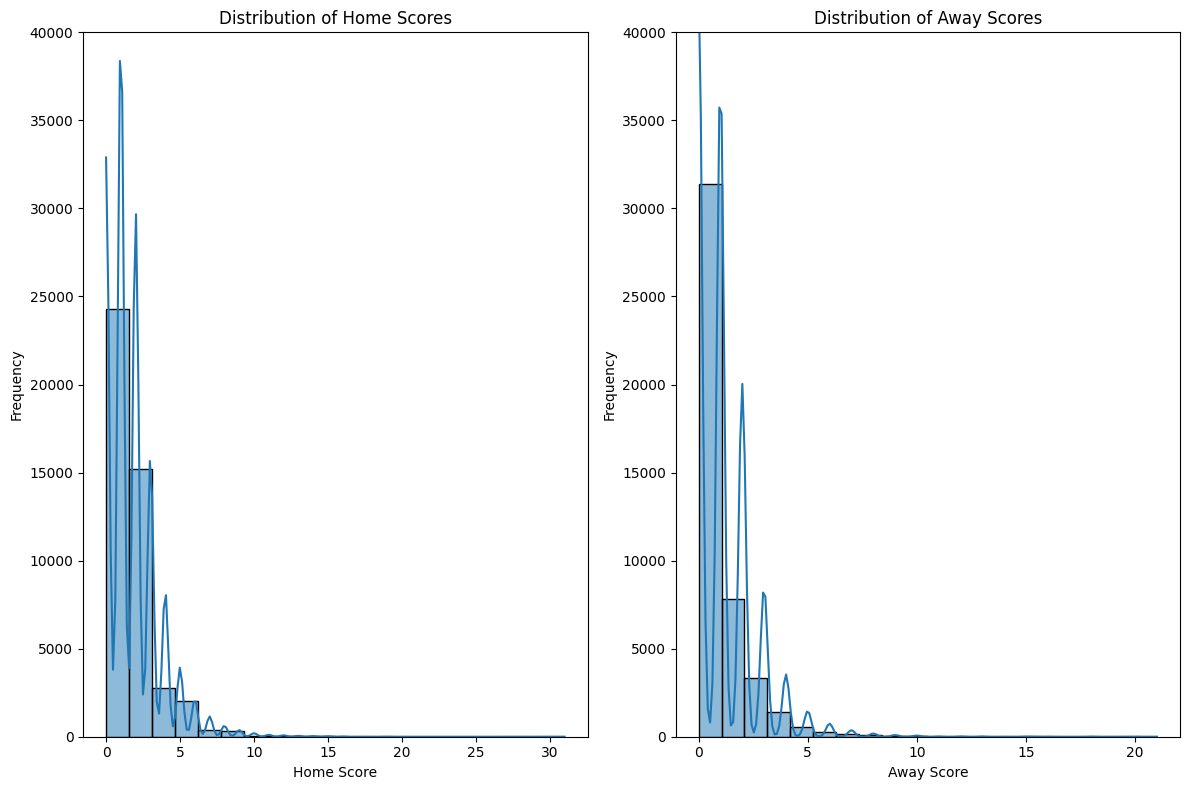

In [42]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['home_score'], bins=20, kde=True)
plt.title('Distribution of Home Scores')
plt.xlabel('Home Score')
plt.ylabel('Frequency')
#Setting limit for first plot
plt.ylim(0, 40000)


plt.subplot(1, 2, 2)
sns.histplot(df['away_score'], bins=20, kde=True)
plt.title('Distribution of Away Scores')
plt.xlabel('Away Score')
plt.ylabel('Frequency')
# Share y-axis between subplots
plt.ylim(0, 40000)

plt.tight_layout()
plt.show()



fig = px.line(df, x='date', y=['home_score', 'away_score'], title='Home and Away Scores Over Time')
fig.show()

# Time Series Analysis

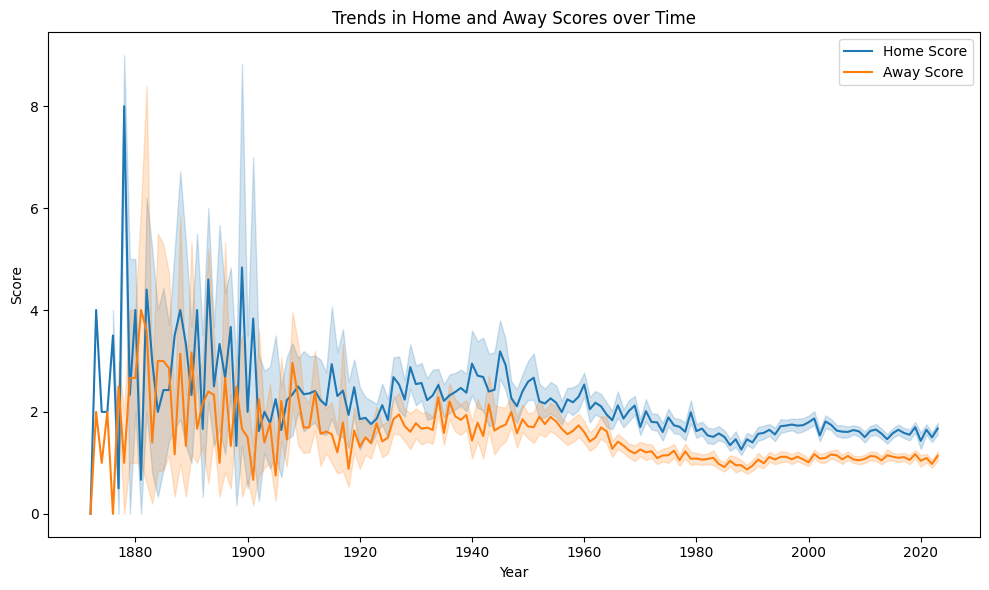

In [43]:
# Create a new column for year
df['year'] = df['date'].dt.year

# Time series analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='home_score', data=df, label='Home Score')
sns.lineplot(x='year', y='away_score', data=df, label='Away Score')
plt.title('Trends in Home and Away Scores over Time')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()


# Plot of Home Score by Team

In [44]:
fig = px.box(df, x='home_team', y='home_score', title='Home Score by Team')
fig.show()

# Plot of Away Score by Team

In [46]:
fig = px.box(df, x='away_team', y='away_score', title='Away Score by Team')
fig.show()

# Count of matches by tournament type

In [45]:
fig = px.histogram(df, x='tournament', title='Count of Matches by Tournament Type')
fig.show()

In [47]:
# Create a new column for total score
df['total_score'] = df['home_score'] + df['away_score']

# Plot total score over time
fig = px.line(df, x='date', y='total_score', title='Total Score Over Time')
fig.show()

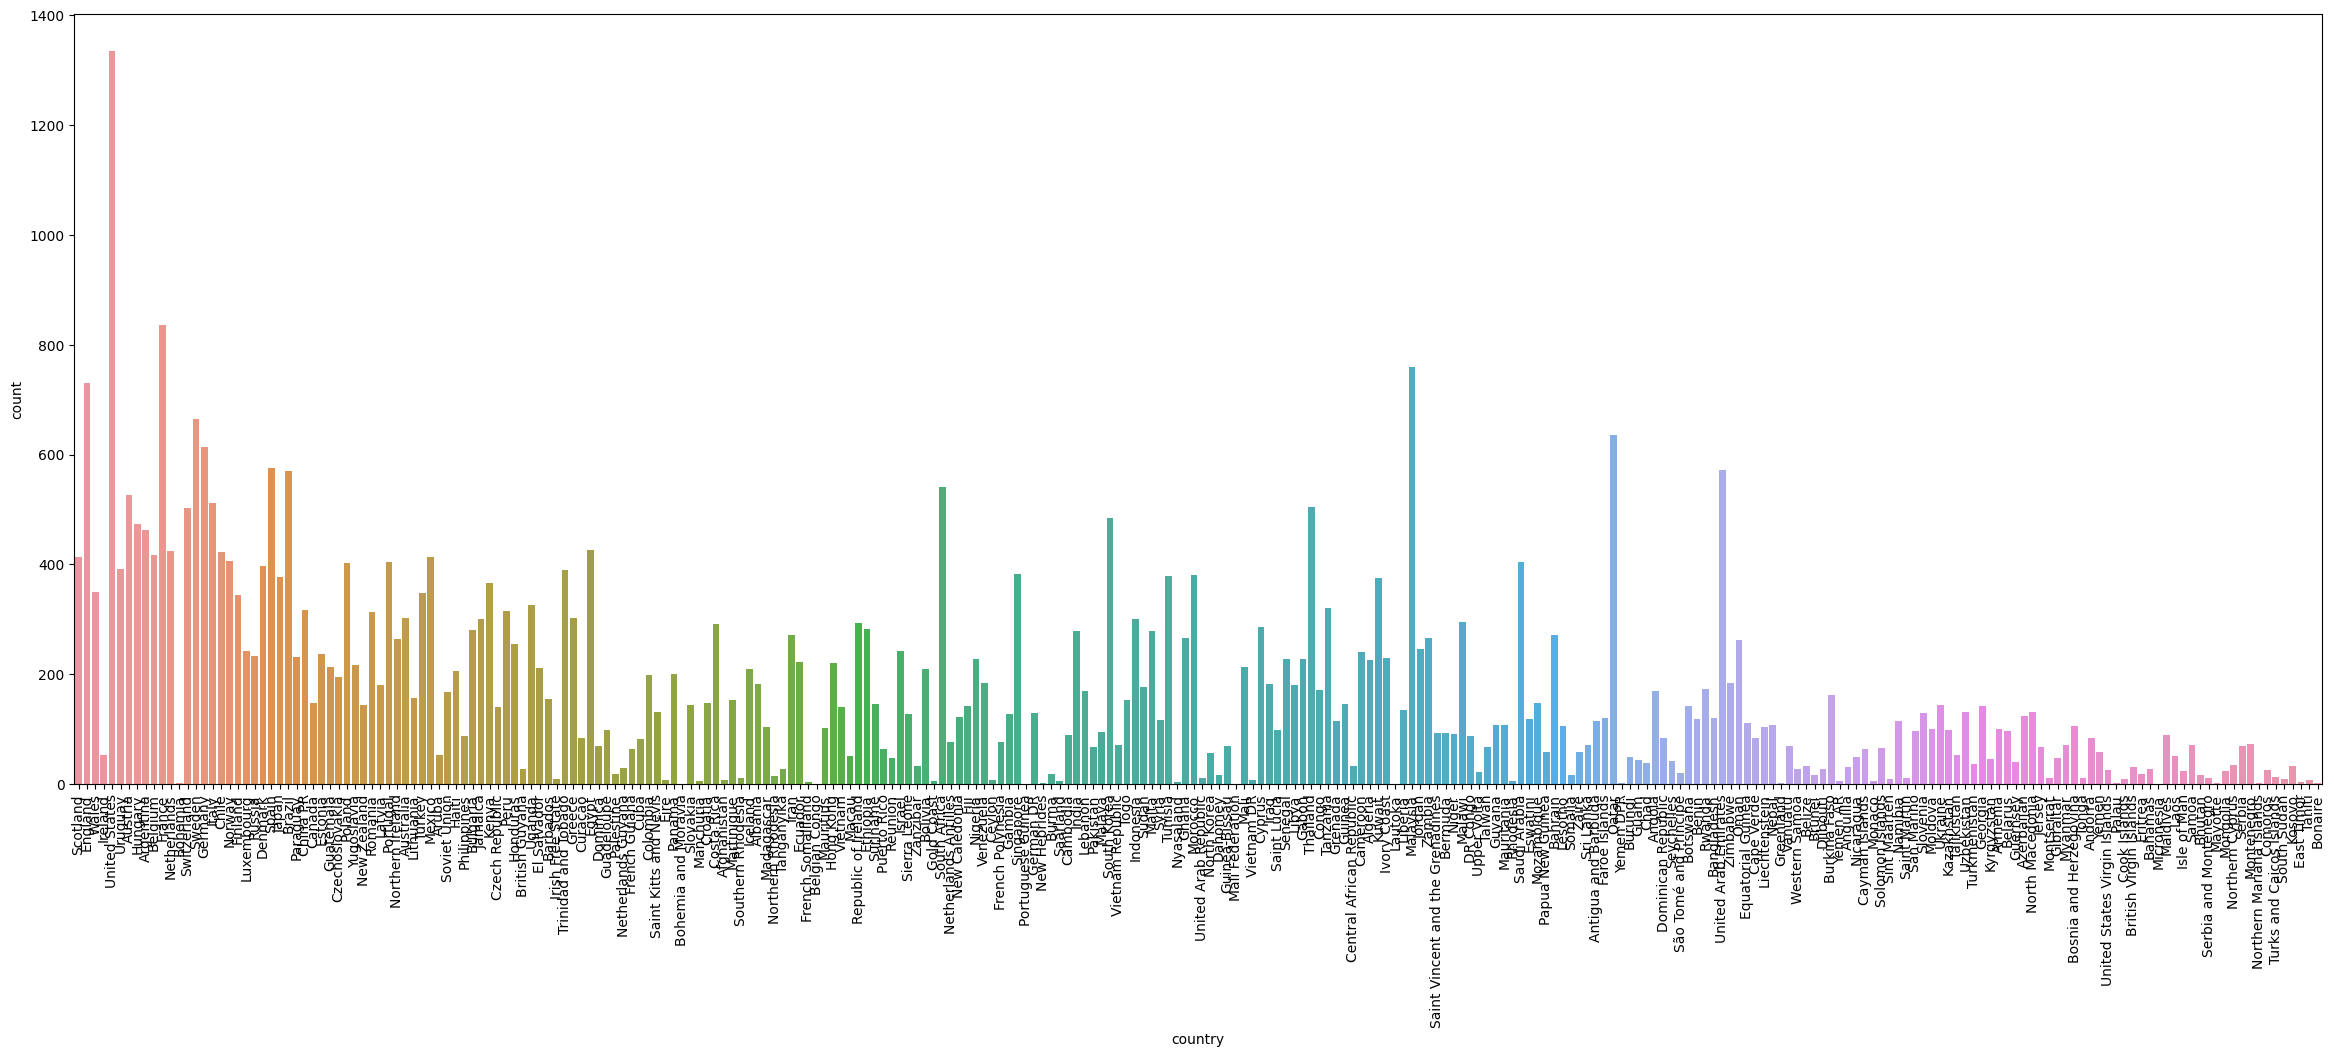

In [53]:
plt.figure(figsize=(29,10))
sns.countplot(data=df,x='country')
plt.xticks(rotation=90)
plt.show()